# 1. ANÁLISE

In [1]:
# Bibliotecas básicas 
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns

# Definições estéticas
plt.style.use('ggplot')
color_pal = sns.color_palette()
sns.set(rc={'figure.figsize':(20,10)})

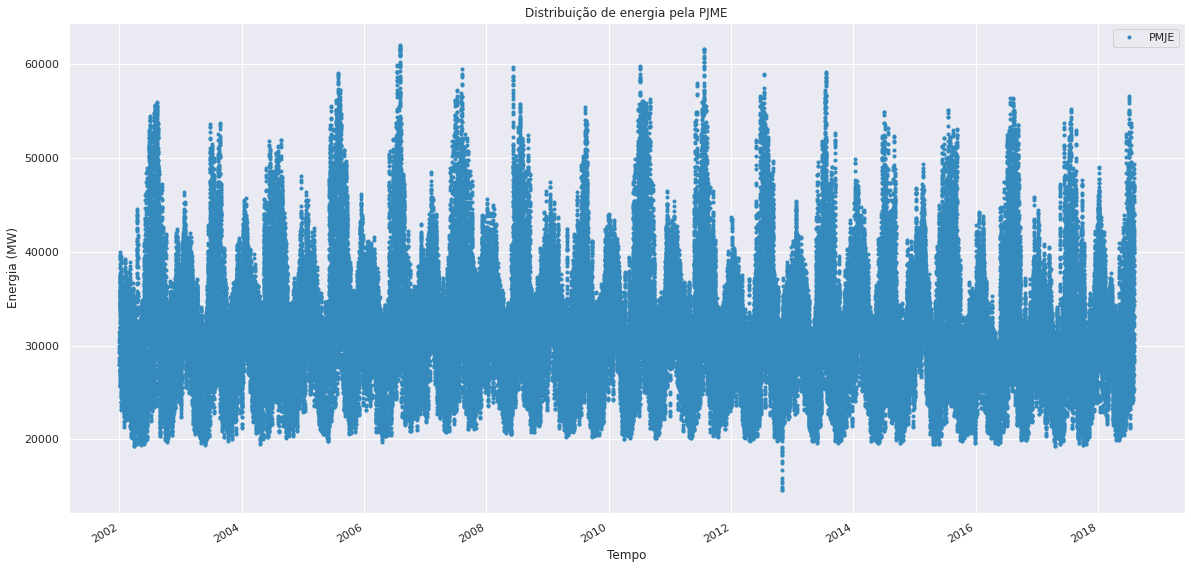

In [40]:
# Base de dados
df = pd.read_csv('/content/PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

df.plot(y= 'PJME_MW',
        style='.',
        color=color_pal[1],
        title='Distribuição de energia pela PJME',
        label= 'PMJE',
        xlabel= 'Tempo',
        ylabel= 'Energia (MW)')
plt.show()

In [3]:
# Criando colunas com os dados do index
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['dayofmonth'] = df.index.day # dia do mês
df['weekofyear'] = df.index.weekofyear
df['weekday'] = df.index.day_name()

<ipython-input-3-2c7bd63fe9eb>:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.weekofyear


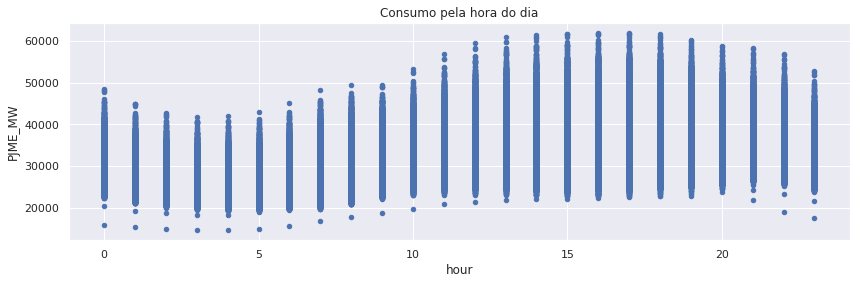

In [4]:
# Consumo pela hora do dia
_ = df[['PJME_MW','hour']].plot(x='hour',
                                y='PJME_MW',
                                kind='scatter',
                                figsize=(14,4),
                                title='Consumo pela hora do dia')

O consumo de energia é menor as sábados e domingos do que durante a semana

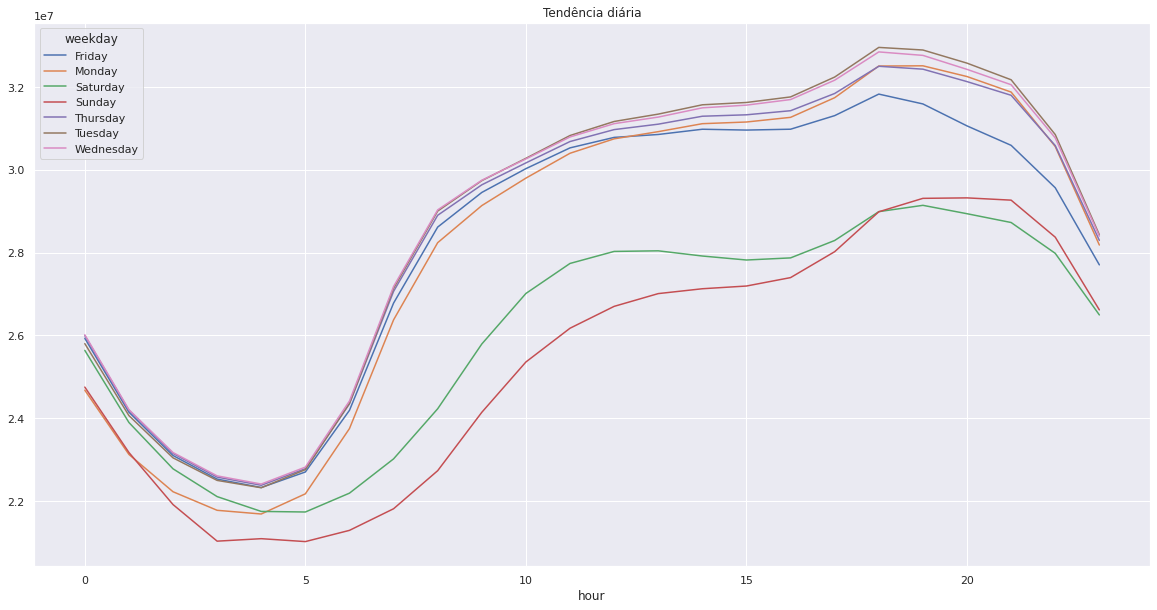

In [5]:
# Tendência de consumo por dia da semana
_ = df.pivot_table(index=df['hour'], 
                     columns='weekday', 
                     values='PJME_MW',
                     aggfunc='sum').plot(title='Tendência diária')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


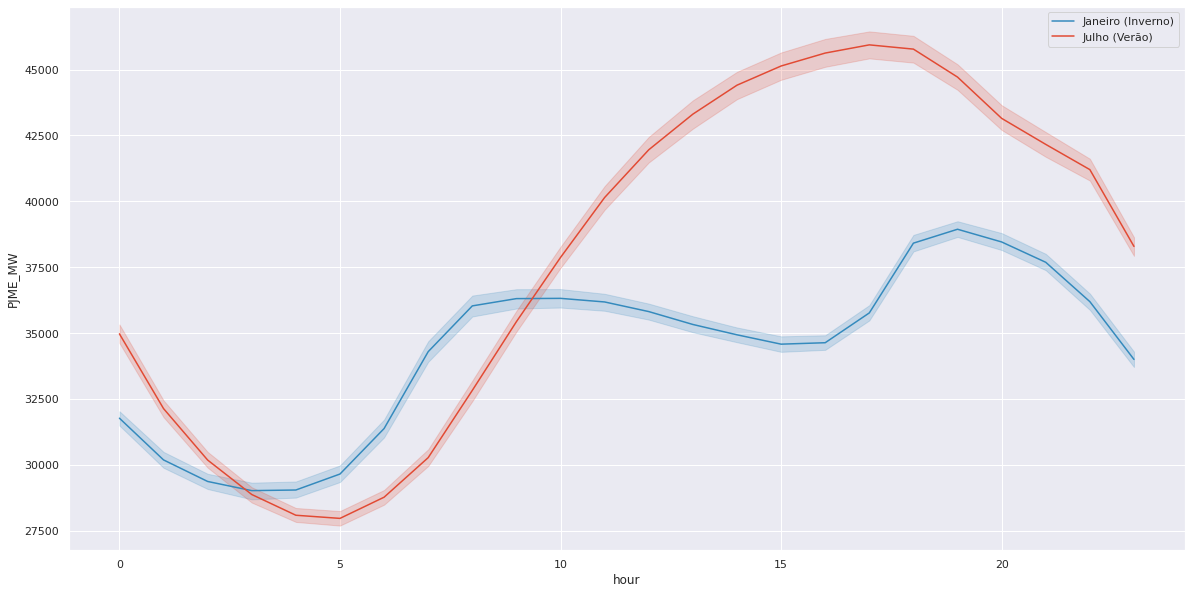

In [6]:
sns.lineplot(df.loc[df['month']==1].hour, df.loc[df['month']==1].PJME_MW, 
             color=color_pal[1],
             label= 'Janeiro (Inverno)')
sns.lineplot(df.loc[df['month']==7].hour, df.loc[df['month']==7].PJME_MW, 
             color=color_pal[0],
             label= 'Julho (Verão)')
# sns.lineplot(df.loc[df['month']==4].hour, df.loc[df['month']==4].PJME_MW, 
#              color=color_pal[5],
#              label= 'Abril (Primavera)')
# sns.lineplot(df.loc[df['month']==10].hour, df.loc[df['month']==10].PJME_MW, 
#              color=color_pal[6],
#              label= 'Outubro (Outono)')

A tendência muda ao longo do ano



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

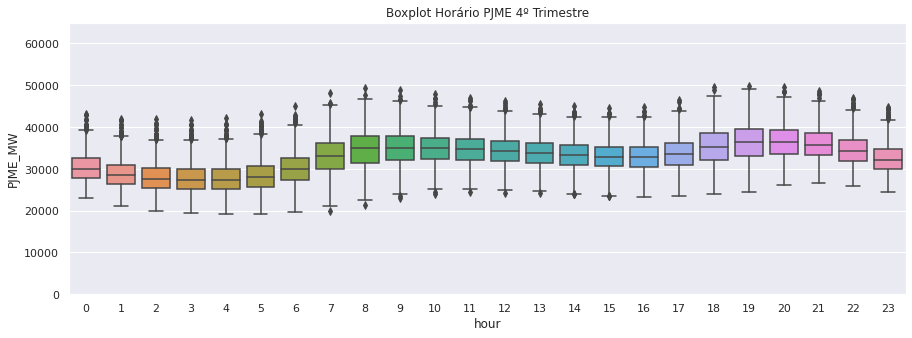

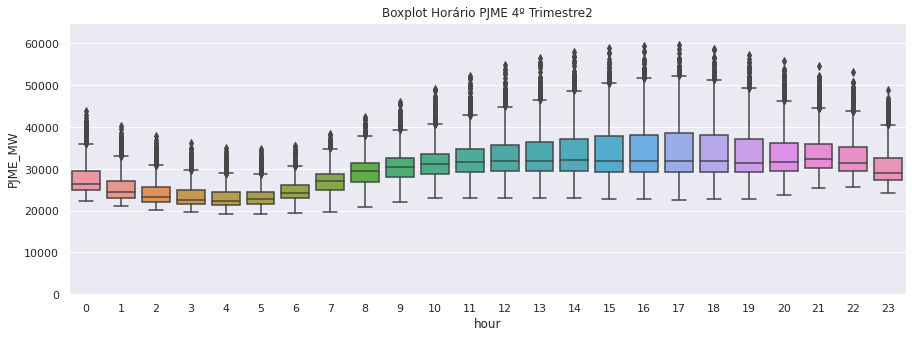

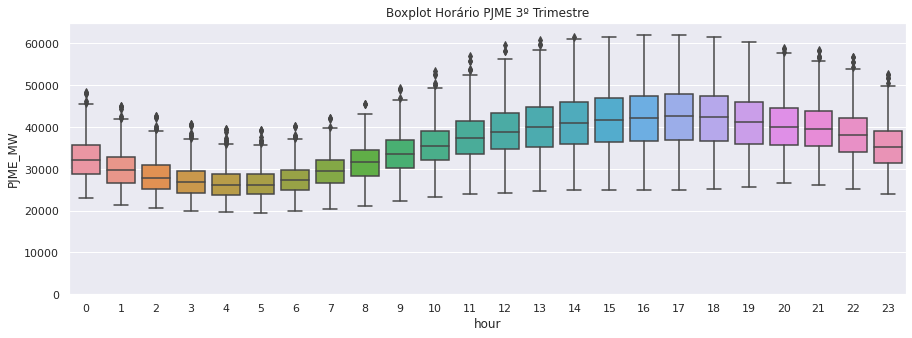

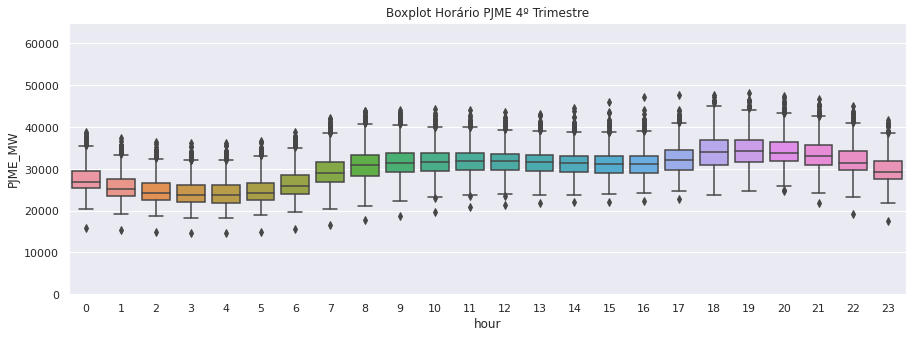

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

# 1º trimestre
sns.boxplot(df.loc[df['quarter']==1].hour, df.loc[df['quarter']==1].PJME_MW)
ax.set_title('Boxplot Horário PJME 4º Trimestre')
ax.set_ylim(0,65000)

# 2º trimestre
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df.loc[df['quarter']==2].hour, df.loc[df['quarter']==2].PJME_MW)
ax.set_title('Boxplot Horário PJME 4º Trimestre2')
ax.set_ylim(0,65000)

# 3º trimestre
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df.loc[df['quarter']==3].hour, df.loc[df['quarter']==3].PJME_MW)
ax.set_title('Boxplot Horário PJME 3º Trimestre')
ax.set_ylim(0,65000)

# 4º trimestre
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df.loc[df['quarter']==4].hour, df.loc[df['quarter']==4].PJME_MW)
ax.set_title('Boxplot Horário PJME 4º Trimestre')
_ = ax.set_ylim(0,65000)

# 1.1 Análise e remoção de outliers

# 1.1.1 Furacão Sandy

In [8]:
df.sort_values('PJME_MW').head(20)

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday
Datetime,,,,,,,,,,
2012-10-30 04:00:00,14544.0,4,1,4,10,2012,304,30,44,Tuesday
2012-10-30 03:00:00,14586.0,3,1,4,10,2012,304,30,44,Tuesday
2012-10-30 05:00:00,14821.0,5,1,4,10,2012,304,30,44,Tuesday
2012-10-30 02:00:00,14955.0,2,1,4,10,2012,304,30,44,Tuesday
2012-10-30 01:00:00,15390.0,1,1,4,10,2012,304,30,44,Tuesday
2012-10-30 06:00:00,15526.0,6,1,4,10,2012,304,30,44,Tuesday
2012-10-30 00:00:00,15919.0,0,1,4,10,2012,304,30,44,Tuesday
2012-10-30 07:00:00,16688.0,7,1,4,10,2012,304,30,44,Tuesday
2012-10-29 23:00:00,17422.0,23,0,4,10,2012,303,29,44,Monday


In [9]:
s2 = df.sort_values('PJME_MW').head(17).copy()
s2.count()

PJME_MW       17
hour          17
dayofweek     17
quarter       17
month         17
year          17
dayofyear     17
dayofmonth    17
weekofyear    17
weekday       17
dtype: int64

In [10]:
df.count()

PJME_MW       145366
hour          145366
dayofweek     145366
quarter       145366
month         145366
year          145366
dayofyear     145366
dayofmonth    145366
weekofyear    145366
weekday       145366
dtype: int64

In [11]:
semsandy = df.drop(s2.index)
semsandy.count()

PJME_MW       145349
hour          145349
dayofweek     145349
quarter       145349
month         145349
year          145349
dayofyear     145349
dayofmonth    145349
weekofyear    145349
weekday       145349
dtype: int64

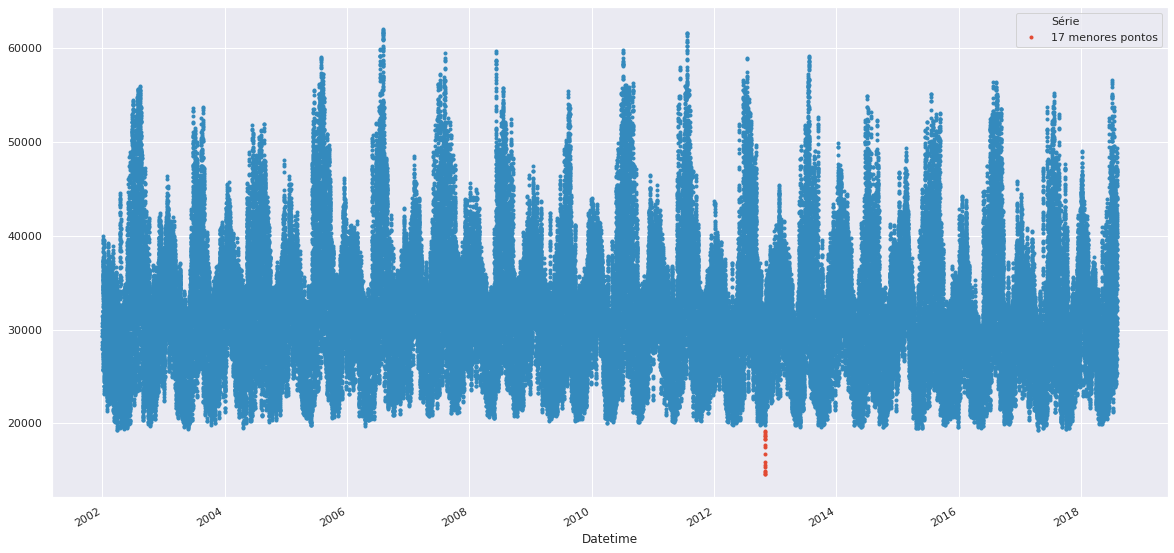

In [12]:
semsandy['PJME_MW'].plot(legend=True, label='Série', style='.', color=color_pal[1])  
s2['PJME_MW'].plot(legend=True, label='17 menores pontos', style='.', color=color_pal[0])

In [13]:
df = semsandy.copy()
df.count()

PJME_MW       145349
hour          145349
dayofweek     145349
quarter       145349
month         145349
year          145349
dayofyear     145349
dayofmonth    145349
weekofyear    145349
weekday       145349
dtype: int64

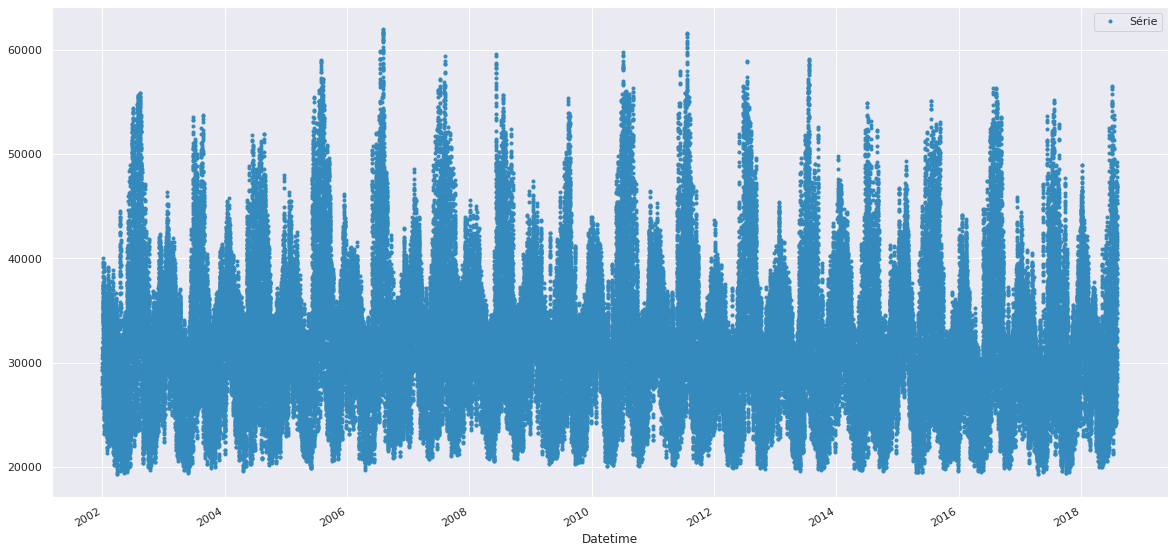

In [14]:
df['PJME_MW'].plot(legend=True, label='Série', style='.', color=color_pal[1])  

# 1.1.2 Remoção de Outliers

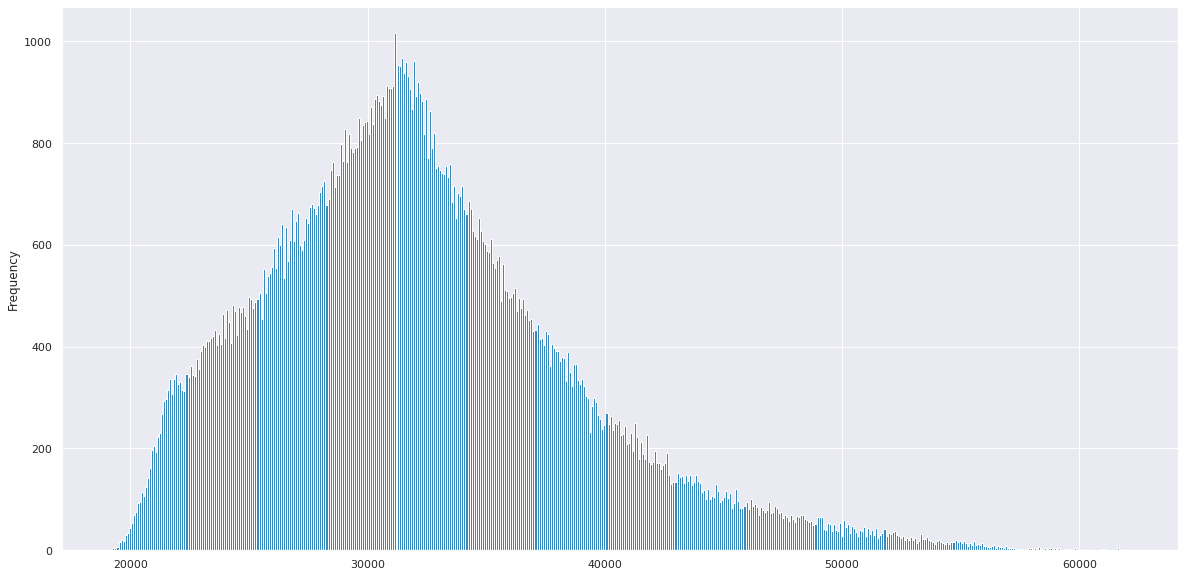

In [15]:
# Histograma
df['PJME_MW'].plot(kind='hist', 
                   color=color_pal[1], 
                   bins=500)

In [41]:
df['PJME_MW'].describe()

count    145366.000000
mean      32080.222831
std        6464.012166
min       14544.000000
25%       27573.000000
50%       31421.000000
75%       35650.000000
max       62009.000000
Name: PJME_MW, dtype: float64

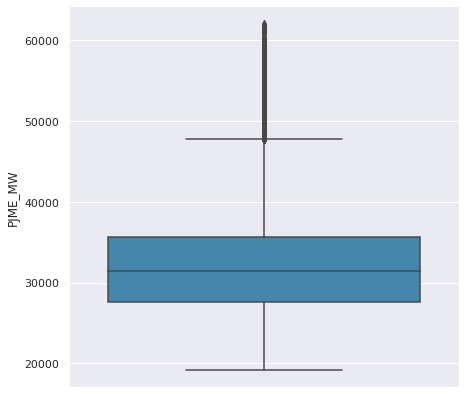

In [16]:
plt.subplots(figsize=(7,7))
sns.boxplot(y = df['PJME_MW'],
            orient = 'v',
            color=color_pal[1])

## 1.1.1 Desvio padrão e amplitude inter-quartil (por dispersão)

Para cada atributo, podemos estudar como os valores estão relacionados com a dispersão dos dados.

Entre as medidas de dispersão temos:

desvio padrão amostral (standard deviation)

amplitude - ou intervalo - interquartil (IQR, interquartile range) Sejam:

$Q_{1}$ o valor relativo aos primeiros 25% dados,

$Q_{2}$ o valor relativo aos primeiros 50% dados (mediana),

$Q_{3}$ o valor relativo aos primeiros 75% dos dados,

$$IQR = Q_{3} - Q_{1}$$

Considerando que os dados são bem ajustados por uma distribuição normal (ou Gaussiana), podemos comparar o uso dessas medidas de dispersão como critério para detectar outliers.

In [17]:
# Variável
Q1 = df['PJME_MW'].quantile(0.25)
Q3 = df['PJME_MW'].quantile(0.75)
IQR = Q3 - Q1

desvp = df['PJME_MW'].std()
media = df['PJME_MW'].mean()
mediana = df['PJME_MW'].median()

print("Mediana = %.2f \n" 
      "IQR = %.2f \n" 
      "Média   = %.2f \n" 
      "Desvio padrao = %.2f" % (mediana, IQR, media, desvp))

Mediana = 31421.00 
IQR = 8075.00 
Média   = 32081.99 
Desvio padrao = 6462.30


In [18]:
out_liminf = Q1-(IQR*1.5)
out_limsup = Q3+(IQR*1.5)

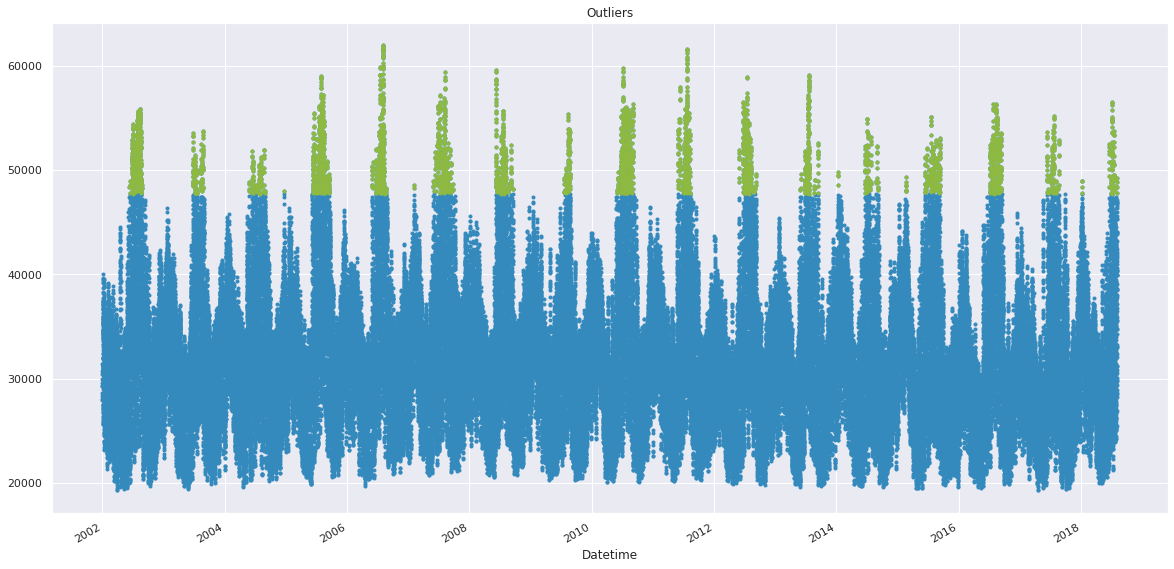

In [19]:
df_outliers = df.query('PJME_MW < @out_liminf | PJME_MW > @out_limsup')
df['PJME_MW'].plot(style='.',
                  color=color_pal[1],
                  title='Inliers')
df_outliers['PJME_MW'].plot(style='.',
                      color=color_pal[5],
                      title='Outliers')


In [20]:
df_outliers.count()

PJME_MW       3454
hour          3454
dayofweek     3454
quarter       3454
month         3454
year          3454
dayofyear     3454
dayofmonth    3454
weekofyear    3454
weekday       3454
dtype: int64

In [21]:
meses_outlier = df_outliers.groupby('month')
meses_outlier['PJME_MW'].count()

month
1        8
2        9
5       35
6      568
7     1657
8     1006
9      170
12       1
Name: PJME_MW, dtype: int64

In [22]:
contagem_meses_outliers = meses_outlier['PJME_MW'].count()
type(contagem_meses_outliers)

pandas.core.series.Series

In [23]:
contagem_meses_outliersa = pd.Series.to_frame(contagem_meses_outliers)
contagem_meses_outliers

month
1        8
2        9
5       35
6      568
7     1657
8     1006
9      170
12       1
Name: PJME_MW, dtype: int64

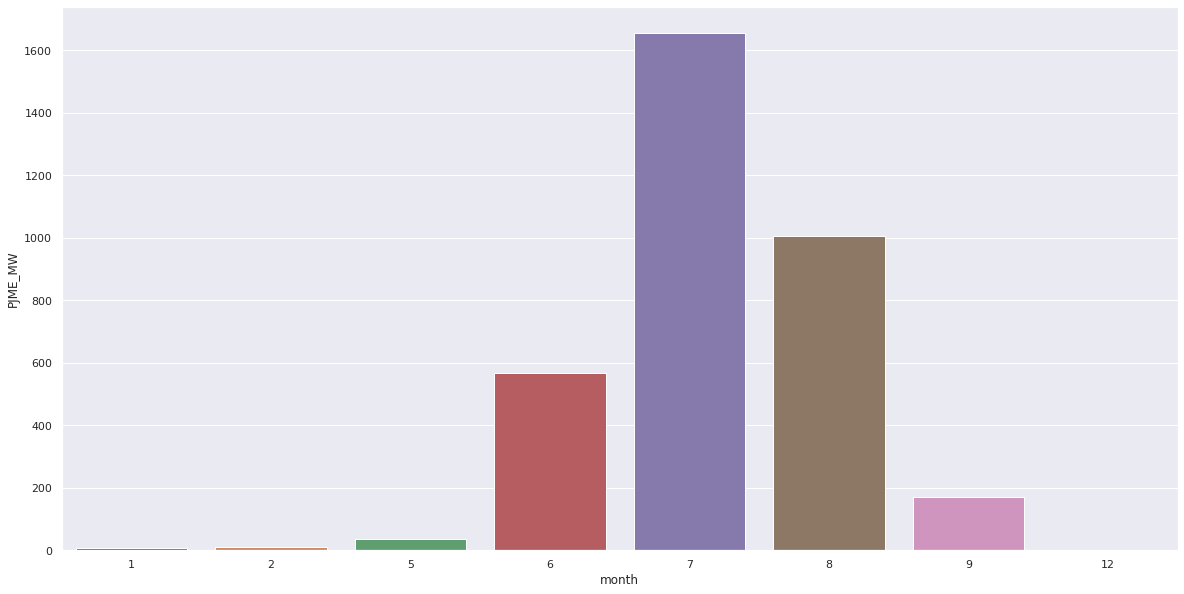

In [24]:
sns.barplot(y=contagem_meses_outliers, x=contagem_meses_outliers.index)

In [25]:
meses_atipicos = df_outliers.query('month == 1 | month == 2 | month == 12')
meses_atipicos['PJME_MW'].count()

18

In [26]:
df = df.drop(meses_atipicos.index)
df.count()

PJME_MW       145331
hour          145331
dayofweek     145331
quarter       145331
month         145331
year          145331
dayofyear     145331
dayofmonth    145331
weekofyear    145331
weekday       145331
dtype: int64

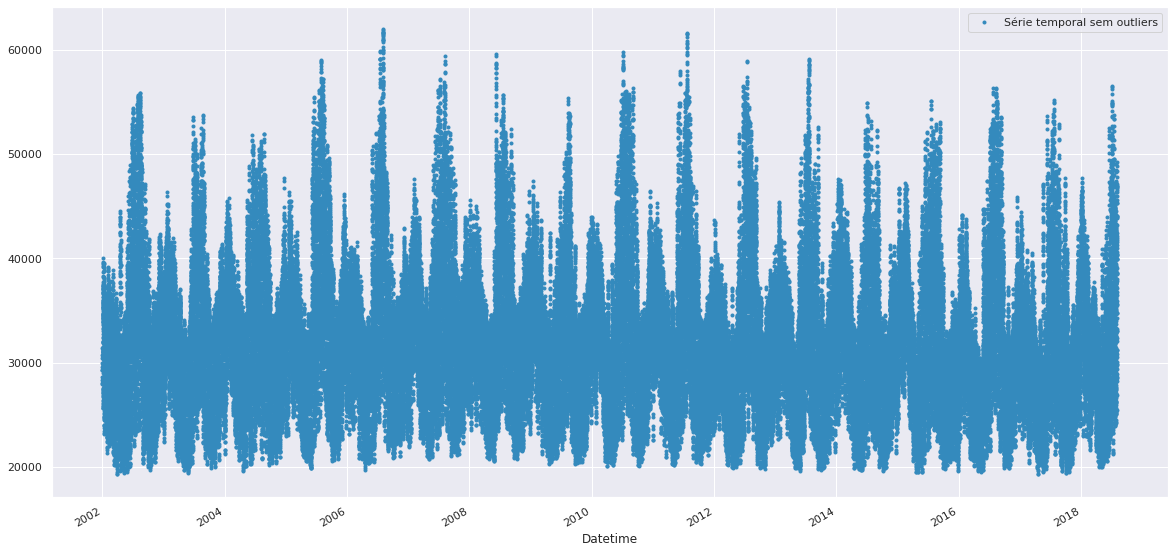

In [27]:
df['PJME_MW'].plot(legend=True, label='Série temporal sem outliers', style='.', color=color_pal[1])  

# 1.2 Série temporal

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

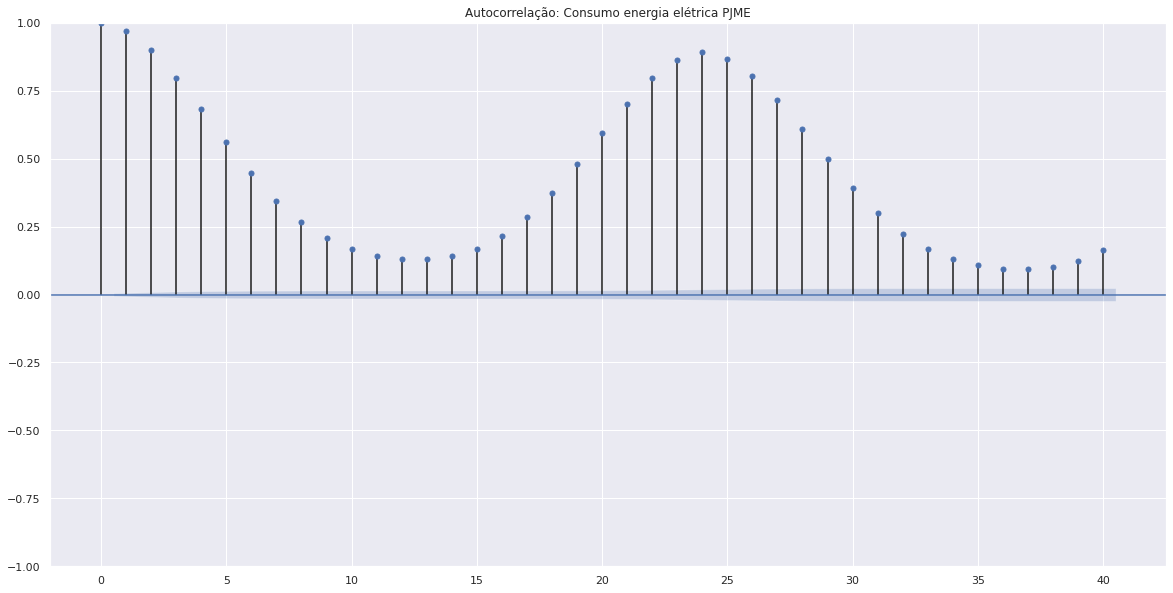

In [29]:
title = 'Autocorrelação: Consumo energia elétrica PJME'
lags = 40
plot_acf(df['PJME_MW'],title=title,lags=lags);

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


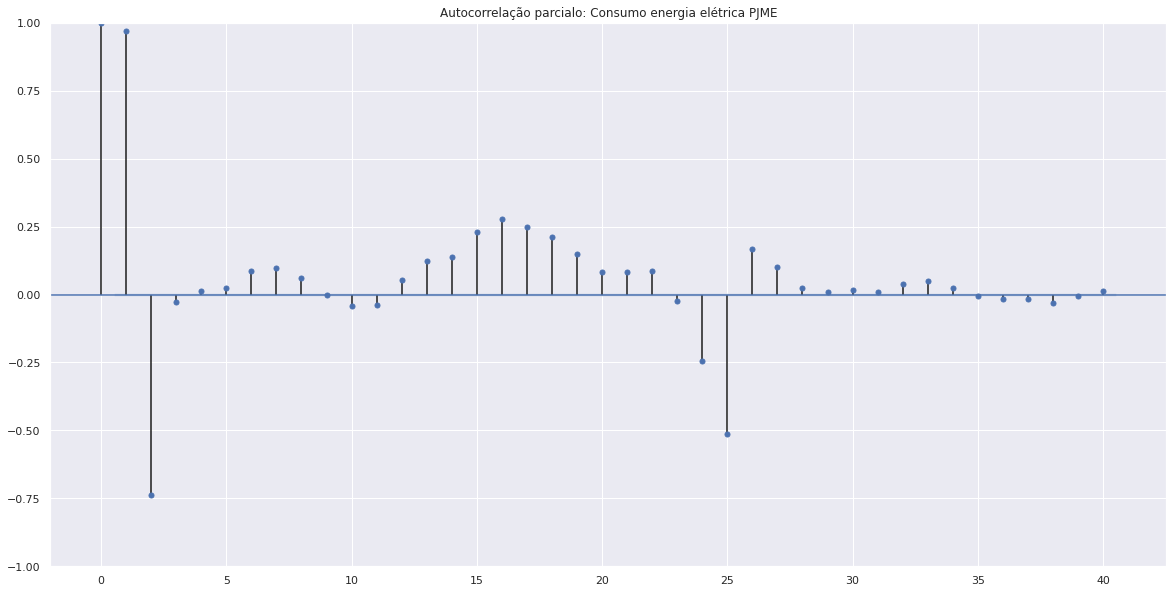

In [30]:
title='Autocorrelação parcial: Consumo energia elétrica PJME'
lags=40
plot_pacf(df['PJME_MW'],title=title,lags=lags);

In [31]:
# INSTALAR ANTES
#!pip install pmdarima

In [33]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df['PJME_MW'])

(0.01, False)

Conclui-se que a série é não estacionária.

# 1.3 Separação Treino / Teste

In [34]:
df.tail()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday
Datetime,,,,,,,,,,
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,1,1,Monday
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,1,1,Monday
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,1,1,Monday
2018-01-01 23:00:00,40164.0,23,0,1,1,2018,1,1,1,Monday
2018-01-02 00:00:00,38608.0,0,1,1,1,2018,2,2,1,Tuesday


In [35]:
# Split treino / teste
# Prever o ultimo ano da série
#data_divisao = '01-01-2017'

# Prever os ultimo dois ano da série
#data_divisao = '01-01-2016'

# Prever os ultimos tres ano da série
data_divisao = '01-01-2015'

treino = df.loc[df.index < data_divisao].copy()
teste = df.loc[df.index >= data_divisao].copy()

print("Treino: ", len(treino), round(len(treino)/len(df)*100, 2),
      "\n Teste: ", len(teste), round(len(teste)/len(df)*100, 2)
      )

Treino:  113902 78.37 
 Teste:  31429 21.63


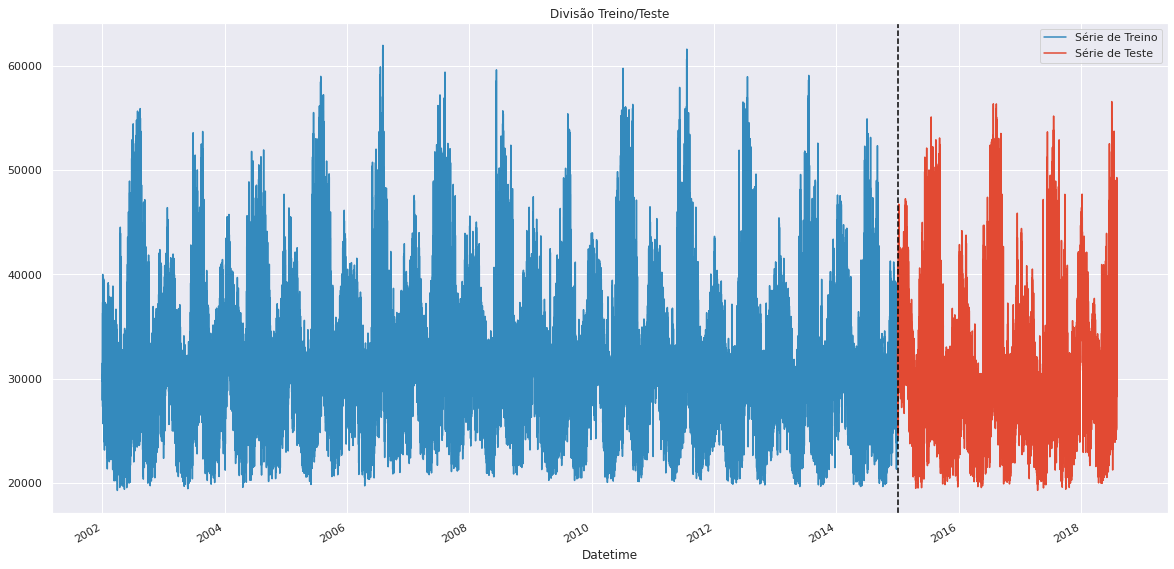

In [36]:
fig, ax = plt.subplots()
treino['PJME_MW'].plot(ax=ax, label='Série de Treino', title='Divisão Treino/Teste', color=color_pal[1])
teste['PJME_MW'].plot(ax=ax, label='Série de Teste', color=color_pal[0])
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Série de Treino', 'Série de Teste'])
plt.show()

# 1.4 Exportando Treino/Teste

In [37]:
# Bibliotecas
import csv
from google.colab import files

In [38]:
# Copiando as colunas de interesse
treino = treino['PJME_MW'].copy()
teste = teste['PJME_MW'].copy()

# Transformando de Series para DataFrame
treino = pd.DataFrame(treino)
teste = pd.DataFrame(teste)

In [39]:
# Transformando para csv
treino.to_csv('treino.csv')
teste.to_csv('teste.csv')

In [ ]:
# A célula anterior deixa o csv na máquina virtual
# Para guardar na máquina local
# files.download("treino.csv")
# files.download("teste.csv")